# Setup


## Loading tensorflow

In [1]:
import tensorflow as tf
import numpy as np

## Loading data and reshaping

Using TensorFlow backend.


(50000, 28, 28) (50000,)


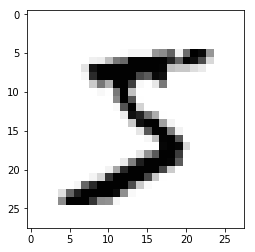

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
print(X_train.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)


In [4]:
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

In [5]:
print(X_train.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)


# Computations

## Placeholder for data

In [6]:
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))
keep_prob = tf.placeholder(tf.float32) # probability of keeping a weight in dropout

## Weights
Random initialization for bias
Xavier initialization for 'weights' W

NN architecture:

1. Input size 784 features of an image,

2. First NN layer 784 in, 128 out-connections
     - Linear function Z1=X*w1+b1
     - Relu activation function
     - Dropout
 
3. Second NN layer 128 in/out connections
     - Linear function Z2=A1*w2+b2
     - Relu activation function
     - Dropout
4. Third NN layer 128 in connections, 10 out connections (10 classification problem)
     - Linear function Z3=A2*w3+b3
     - Sigmoid
     
     ( - Softmax - but applied through loss function crossentropy)


In [7]:
W1 = tf.get_variable("W1",  [784, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [128], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",  [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [128], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", [128, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3",  [10], initializer=tf.zeros_initializer())

In [8]:
Z1 = tf.matmul(X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3)+b3
A3 = tf.nn.sigmoid(Z3)

In [9]:
def compute_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

Initializing learning rate with exponential decay, It will allow to converge faster to minimum.

In [16]:
cost = compute_cost(A3, Y)
starter_learning_rate = 0.0005
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

### Perform one-hot encoding for Y vectors

As  shown `X_train[0]` is five letter

In [11]:
y_train[0]

5

In [12]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [13]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [14]:
y_train[0][5]==1

True

Train cost after 10 epochs: 1.50649
Test cost after 10 epochs: 1.50715
Train cost after 20 epochs: 1.48873
Test cost after 20 epochs: 1.49298
Train cost after 30 epochs: 1.48047
Test cost after 30 epochs: 1.4875
Train cost after 40 epochs: 1.47611
Test cost after 40 epochs: 1.48439
Train cost after 50 epochs: 1.47311
Test cost after 50 epochs: 1.48267
Train cost after 60 epochs: 1.47128
Test cost after 60 epochs: 1.48141
Train cost after 70 epochs: 1.4696
Test cost after 70 epochs: 1.47973
Train cost after 80 epochs: 1.46826
Test cost after 80 epochs: 1.47942
Train cost after 90 epochs: 1.4674
Test cost after 90 epochs: 1.47933
Train cost after 100 epochs: 1.46671
Test cost after 100 epochs: 1.47906


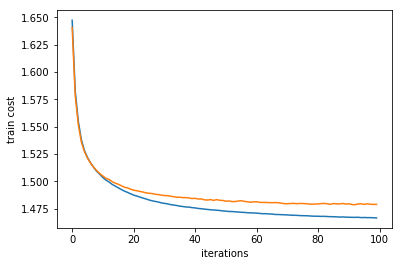

Train Accuracy: 0.99412
Test Accuracy: 0.9797


In [17]:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    test_costs = []
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size], keep_prob : 0.65})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train, keep_prob : 1}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test, keep_prob : 1}))
        if epoch%10 == 9:
            print("Train cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(test_costs[-1]))
    iterations = list(range(100))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)